In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/hrisikesh-neogi/credit-card-fraud-detection/main/notebooks/creditCardFraud_28011964_120214.csv')

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,167532.467532,1.589411,1.776224,1.604396,34.945055,-0.004995,-0.161838,-0.164835,-0.283716,-0.283716,...,40748.408591,39078.666334,38012.011988,5382.339660,5051.400599,4176.149850,4671.488511,5331.049950,5090.704296,0.213786
std,130587.921320,0.492187,0.750916,0.532298,9.219760,1.173446,1.228732,1.262459,1.184662,1.170224,...,68206.929510,63108.238729,63074.415024,12180.755275,15626.153184,10514.647502,13269.943983,16812.536877,23658.888052,0.410183
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3684.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1423.000000,1206.000000,830.000000,1000.000000,390.000000,228.000000,148.000000,189.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17710.000000,17580.000000,15846.000000,2184.000000,1710.000000,1206.000000,1398.000000,1306.000000,1250.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48851.000000,46404.000000,46557.000000,5090.000000,4500.000000,3720.000000,4000.000000,3745.000000,3784.000000,0.000000
max,700000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,628699.000000,484612.000000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,1001.0,167532.467532,130587.921320,10000.0,50000.0,140000.0,240000.0,700000.0
SEX,1001.0,1.589411,0.492187,1.0,1.0,2.0,2.0,2.0
EDUCATION,1001.0,1.776224,0.750916,1.0,1.0,2.0,2.0,6.0
MARRIAGE,1001.0,1.604396,0.532298,0.0,1.0,2.0,2.0,3.0
AGE,1001.0,34.945055,9.219760,21.0,28.0,33.0,41.0,75.0
PAY_0,1001.0,-0.004995,1.173446,-2.0,-1.0,0.0,0.0,8.0
PAY_2,1001.0,-0.161838,1.228732,-2.0,-1.0,0.0,0.0,7.0
PAY_3,1001.0,-0.164835,1.262459,-2.0,-1.0,0.0,0.0,7.0
PAY_4,1001.0,-0.283716,1.184662,-2.0,-1.0,0.0,0.0,7.0
PAY_5,1001.0,-0.283716,1.170224,-2.0,-1.0,0.0,0.0,7.0


In [7]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Length: 1001, dtype: bool

In [9]:
df.skew()

LIMIT_BAL                      1.011019
SEX                           -0.364047
EDUCATION                      0.875019
MARRIAGE                      -0.104653
AGE                            0.817570
PAY_0                          1.509158
PAY_2                          1.208410
PAY_3                          1.226851
PAY_4                          1.217037
PAY_5                          1.053218
PAY_6                          1.064620
BILL_AMT1                      2.671027
BILL_AMT2                      2.777126
BILL_AMT3                      2.901497
BILL_AMT4                      3.578203
BILL_AMT5                      3.107180
BILL_AMT6                      2.636691
PAY_AMT1                       7.749893
PAY_AMT2                      10.752948
PAY_AMT3                       6.744377
PAY_AMT4                       7.454775
PAY_AMT5                       7.034632
PAY_AMT6                      15.241538
default payment next month     1.398337
dtype: float64

In [54]:
x=df.drop('default payment next month',axis=1)
y=df['default payment next month']

In [55]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
1,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
2,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
3,100000,2,2,2,23,0,-1,-1,0,0,...,601,221,-159,567,380,601,0,581,1687,1542
4,140000,2,3,1,28,0,0,2,0,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [57]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

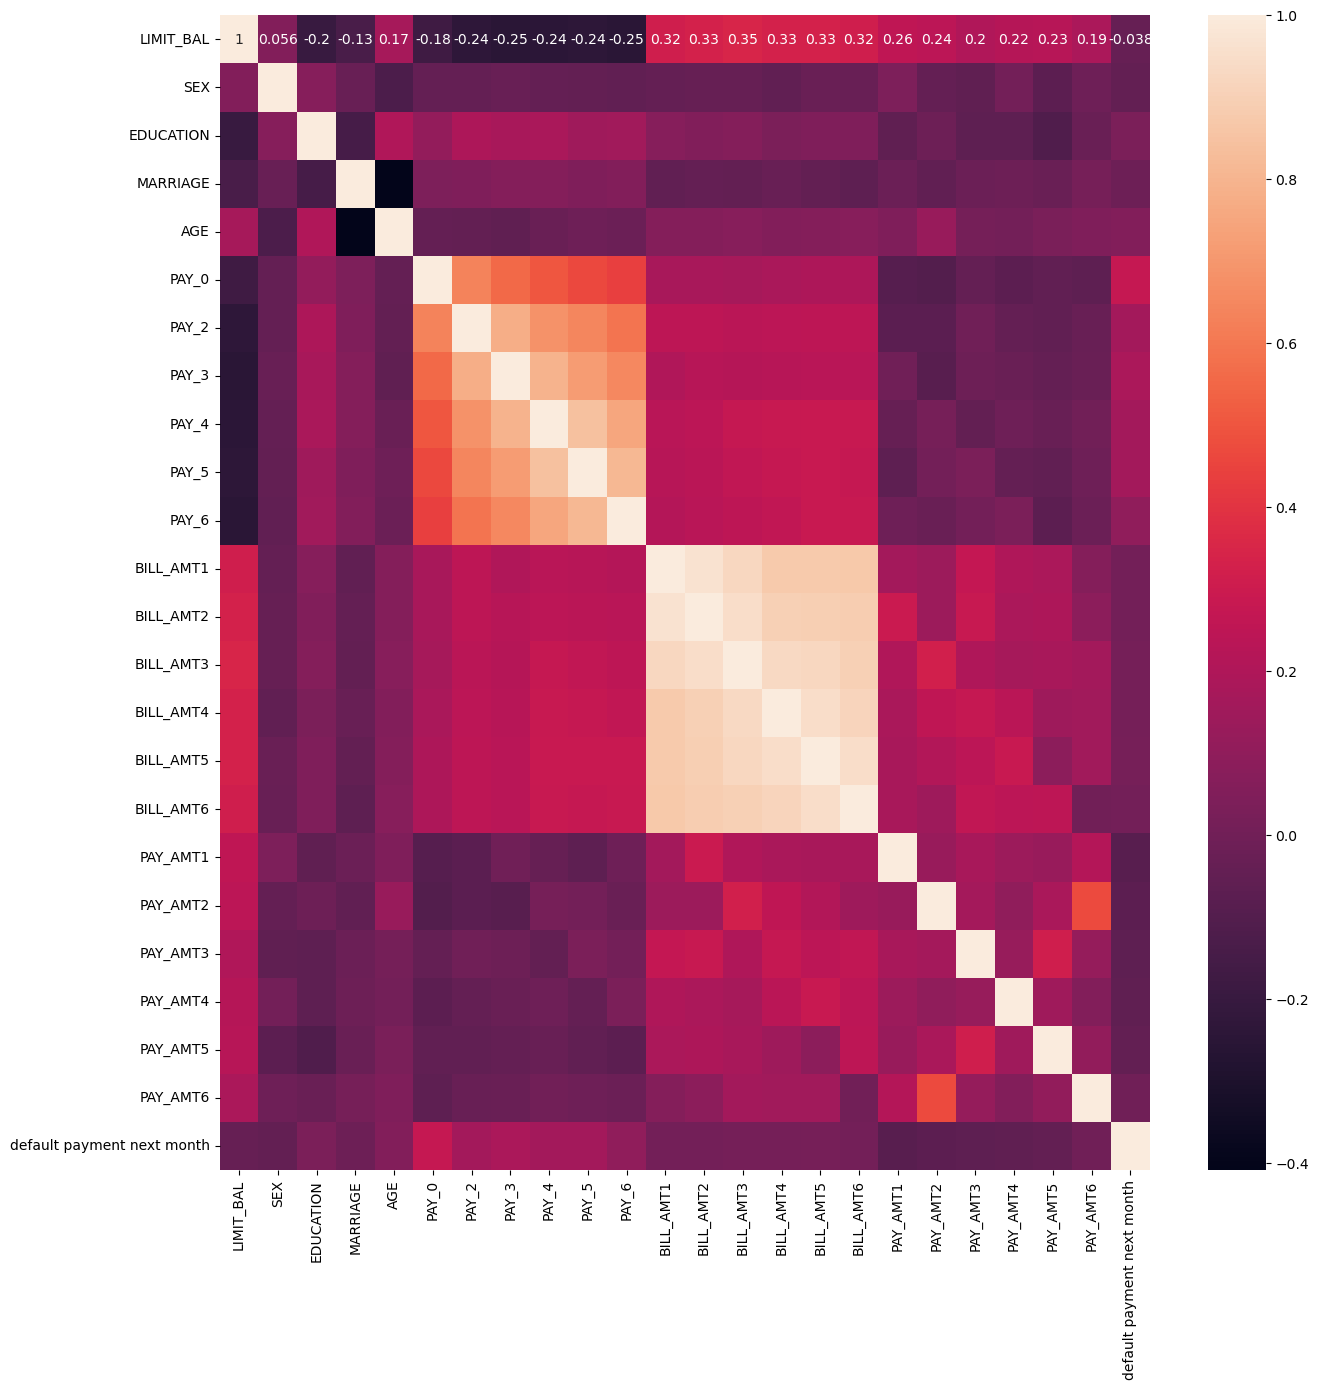

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split as tts

In [37]:
xtr,xte,ytr,yte=tts(x,y,random_state=42,test_size=0.3)

In [38]:
from sklearn.preprocessing import StandardScaler 

In [39]:
scaler=StandardScaler()

In [40]:
xtr=scaler.fit_transform(xtr)

In [41]:
xte=scaler.transform(xte)

In [42]:
from sklearn.naive_bayes import GaussianNB

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
train_df=pd.DataFrame(xtr,columns=x.columns)

In [62]:
test_df=pd.DataFrame(xte,columns=x.columns)

In [65]:
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [66]:
gnb.fit(train_df,ytr)

GaussianNB()

In [68]:
rfc.fit(train_df,ytr)

RandomForestClassifier()

In [69]:
from sklearn.metrics import accuracy_score as acs, confusion_matrix as cm, classification_report as cr

In [75]:
ypre_nb=gnb.predict(xte)
ypre_rf=rfc.predict(xte)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [76]:
print(f'Accuracy of Naive Bayes: {acs(yte,y_pred=ypre_nb)}')
print(f'Accuracy of Naive Bayes: {acs(yte,y_pred=ypre_rf)}')

Accuracy of Naive Bayes: 0.6710963455149501
Accuracy of Naive Bayes: 0.8637873754152824


In [78]:
print(cr(yte,ypre_nb))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       251
           1       0.28      0.62      0.39        50

    accuracy                           0.67       301
   macro avg       0.59      0.65      0.58       301
weighted avg       0.80      0.67      0.71       301



In [79]:
print(cr(yte,ypre_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       251
           1       0.70      0.32      0.44        50

    accuracy                           0.86       301
   macro avg       0.79      0.65      0.68       301
weighted avg       0.85      0.86      0.84       301



In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
params={'var_smoothing':[0.1,0.01,0.5,0.005,0.001,1e-6,1e-8,1e-10,1e-11]}

In [82]:
grid=GridSearchCV(estimator=gnb,param_grid=params,cv=5,verbose=3)

In [83]:
grid.fit(train_df,ytr)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .................var_smoothing=0.1;, score=0.364 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.764 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.721 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.679 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.714 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.01;, score=0.336 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.743 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.693 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.679 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.693 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.5;, score=0.714 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.5;,

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.01, 0.5, 0.005, 0.001, 1e-06,
                                           1e-08, 1e-10, 1e-11]},
             verbose=3)

In [84]:
grid.best_params_

{'var_smoothing': 0.5}

In [85]:
ypred_nb2=grid.predict(test_df)

In [87]:
acs(yte,ypred_nb2)

0.8039867109634552

In [89]:
print(cr(yte,ypred_nb2))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       251
           1       0.40      0.38      0.39        50

    accuracy                           0.80       301
   macro avg       0.64      0.63      0.64       301
weighted avg       0.80      0.80      0.80       301



In [90]:
rcf=RandomForestClassifier()

In [96]:
params={'n_estimators':[100,200,300],
        'max_depth':range(3,11,1),
       'criterion':['gini','entropy']}

In [97]:
grid2=GridSearchCV(estimator=rcf,param_grid=params,verbose=2,cv=5)

In [98]:
grid2.fit(train_df,ytr)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......criterion=gini, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ......criterion=gini, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......criterion=gini, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......criterion=gini, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......criterion=gini, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ......criterion=gini, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ......criterion=gini, max_depth=3, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 11),
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [99]:
grid2.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [101]:
ypred_rcf=grid2.predict(test_df)

In [103]:
print(cr(yte,ypred_rcf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       251
           1       0.61      0.22      0.32        50

    accuracy                           0.85       301
   macro avg       0.74      0.60      0.62       301
weighted avg       0.82      0.85      0.82       301

